In [40]:
ff_file_path = '/Users/lavo/Desktop/Projects/spm/proj/log/log/ff/output_128_ff_16567.txt'
seq_file_path = '/Users/lavo/Desktop/Projects/spm/proj/log/log/seq/output_100s_seq_15936.txt'

In [41]:
print('seq file path:', seq_file_path)
print('ff file path:', ff_file_path)

seq file path: /Users/lavo/Desktop/Projects/spm/proj/log/log/seq/output_100s_seq_15936.txt
ff file path: /Users/lavo/Desktop/Projects/spm/proj/log/log/ff/output_128_ff_16567.txt


In [63]:
# Function to parse the FastFlow execution file
def parse_fastflow_file(filepath):
    with open(filepath, 'r') as file:
        lines = file.readlines()
    
    compression_results = {}
    decompression_results = {}
    
    for i, line in enumerate(lines):
        if 'decompression' in line:
            l = int(line.split('-l')[1].split()[0])
            w = int(line.split('-w')[1].split()[0])
            time = float(lines[i + 1].split('Time:')[1].split('(')[0].strip())
            time = round(time, 1)
            
            if l not in decompression_results:
                decompression_results[l] = []
            decompression_results[l].append((w, time))
        
        elif 'compression' in line:
            l = int(line.split('-l')[1].split()[0])
            w = int(line.split('-w')[1].split()[0])
            time = float(lines[i + 1].split('Time:')[1].split('(')[0].strip())
            time = round(time, 1)
            
            if l not in compression_results:
                compression_results[l] = []
            compression_results[l].append((w, time))
    
    return compression_results, decompression_results

# Example usage
ff_file_path = '/Users/lavo/Desktop/Projects/spm/proj/log/log/ff/output_128_ff_16567.txt'
compression_results, decompression_results = parse_fastflow_file(ff_file_path)

# Accessing all the elements of compression for l=1 to obtain a list of times
l_value = 1
compression_times_for_l = [time for w, time in compression_results.get(l_value, [])]
print(f"Compression times for l={l_value}: {compression_times_for_l}")

Compression times for l=1: [7155.7, 3978.4, 2315.3, 1565.5, 1269.7, 1335.6, 1202.3, 1153.5, 1221.7, 1219.7, 1197.6, 1162.7, 1145.3, 1155.5, 1289.0]


In [64]:
print(compression_results)

{1: [(1, 7155.7), (2, 3978.4), (4, 2315.3), (8, 1565.5), (16, 1269.7), (20, 1335.6), (22, 1202.3), (24, 1153.5), (26, 1221.7), (27, 1219.7), (28, 1197.6), (29, 1162.7), (30, 1145.3), (31, 1155.5), (32, 1289.0)], 2: [(1, 7122.5), (2, 3958.7), (4, 2433.0), (8, 1557.6), (16, 1318.8), (20, 1329.5), (22, 1216.6), (24, 1178.1), (26, 1193.6), (27, 1188.0), (28, 1169.0), (29, 1139.4), (30, 1218.5), (31, 1157.5), (32, 1247.5)], 4: [(1, 7216.6), (2, 4017.1), (4, 2415.3), (8, 1612.8), (16, 1284.5), (20, 1324.1), (22, 1391.6), (24, 1171.0), (26, 1223.7), (27, 1156.7), (28, 1171.7), (29, 1192.2), (30, 1173.8), (31, 1179.9), (32, 1235.6)], 8: [(1, 7122.1), (2, 3973.9), (4, 2436.2), (8, 1601.9), (16, 1272.2), (20, 1313.2), (22, 1244.3), (24, 1221.8), (26, 1223.9), (27, 1215.1), (28, 1174.2), (29, 1199.1), (30, 1235.1), (31, 1189.3), (32, 1243.9)]}


In [66]:
sequential_time_comp = 6725

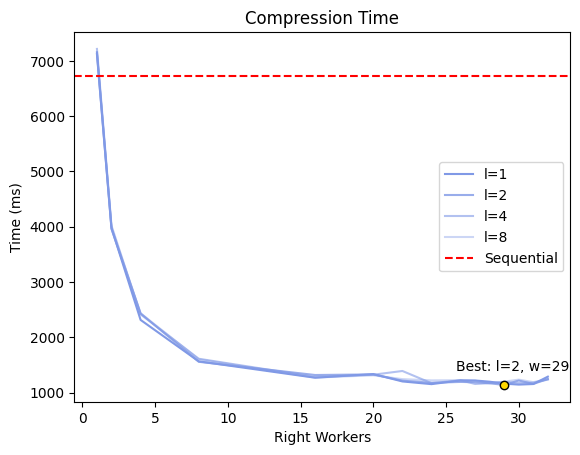

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Define a base color (grey)
base_color = np.array([0.5, 0.6, 0.9])  # RGB for grey

# Function to adjust the opacity of the base color
def adjust_opacity(color, opacity):
    return np.append(color, opacity)

# Plotting the compression results
fig, ax = plt.subplots()

# Variables to track the best point
best_time = float('inf')
best_l = None
best_w = None

for i, (l, results) in enumerate(compression_results.items()):
    ws, times = zip(*results)
    opacity = 1 - (i * 0.2)  # Adjust opacity for each l
    color_with_opacity = adjust_opacity(base_color, opacity)
    ax.plot(ws, times, label=f"l={l}", color=color_with_opacity)
    
    # Find the best point
    min_time = min(times)
    if min_time < best_time:
        best_time = min_time
        best_l = l
        best_w = ws[times.index(min_time)]

# Highlight the best point
ax.scatter(best_w, best_time, color='gold', edgecolor='black', zorder=5)
ax.annotate(f"Best: l={best_l}, w={best_w}", (best_w, best_time), textcoords="offset points", xytext=(6,10), ha='center')

ax.axhline(y=sequential_time_comp, color='r', linestyle='--', label='Sequential')

ax.set_xlabel("Right Workers")
ax.set_ylabel("Time (ms)")
ax.set_title("Compression Time")
ax.legend()
plt.show()

{1: [0.9398102212222424, 1.690378041423688, 2.904591197684965, 4.295752155860748, 5.296526738599669, 5.035190176699611, 5.593445895367213, 5.8300823580407455, 5.504624703282311, 5.513650897761744, 5.615397461589847, 5.7839511481895585, 5.871823976250764, 5.819991345737776, 5.21722265321955], 2: [0.9441909441909442, 1.698790006820421, 2.7640772708590218, 4.31753980482794, 5.099332726721262, 5.058292591199699, 5.527700147953313, 5.708343943638062, 5.63421581769437, 5.660774410774411, 5.752780153977759, 5.902229243461471, 5.519080837094789, 5.809935205183585, 5.390781563126253], 4: [0.9318792783305158, 1.6740932513504767, 2.78433320912516, 4.169766865079366, 5.23550019462826, 5.078921531606374, 4.832566829548721, 5.742954739538856, 5.495628013401977, 5.813953488372093, 5.73952376888282, 5.640832075155175, 5.729255409780201, 5.699635562335791, 5.442699902881191], 8: [0.9442439729854958, 1.6922922066483805, 2.760446597159511, 4.198139709095449, 5.2861185348215685, 5.121078282059092, 5.40464

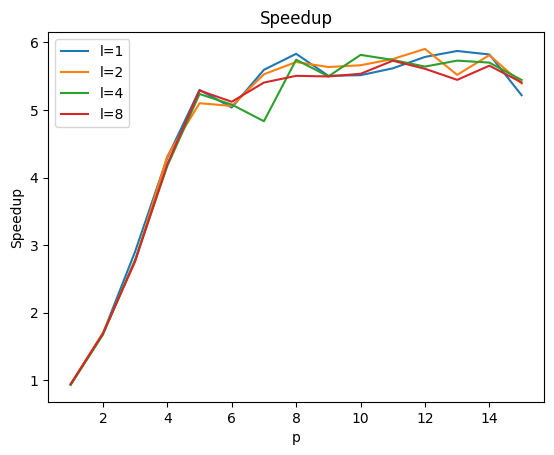

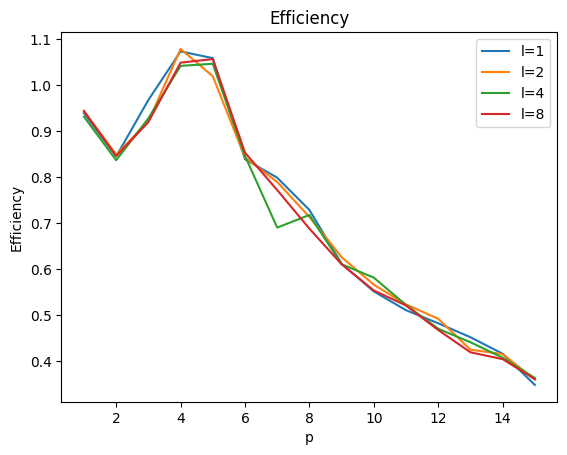

In [69]:
#speedup and efficiency
speedup = {}
efficiency = {}
for l, results in compression_results.items():
    ws, times = zip(*results)
    speedup[l] = [sequential_time_comp / time for time in times]
    efficiency[l] = [speed / p for speed, p in zip(speedup[l], range(1, len(times) + 1))]

print(speedup)

# Plotting the speedup
fig, ax = plt.subplots()
for l, results in speedup.items():
    ax.plot(range(1, len(results) + 1), results, label=f"l={l}")

ax.set_xlabel("p")
ax.set_ylabel("Speedup")
ax.set_title("Speedup")
ax.legend()
plt.show()

# Plotting the efficiency
fig, ax = plt.subplots()
for l, results in efficiency.items():
    ax.plot(range(1, len(results) + 1), results, label=f"l={l}")

ax.set_xlabel("p")
ax.set_ylabel("Efficiency")
ax.set_title("Efficiency")
ax.legend()
plt.show()
